In [737]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.ops import voronoi_diagram
from shapely.geometry import MultiPoint, Polygon, Point
rng = np.random.default_rng()

import matplotlib.pyplot as plt

In [660]:
test = False
while not(test):   
        x = rng.uniform(polygon.bounds.minx[0],polygon.bounds.maxx[0], pts * 3)
        y = rng.uniform(polygon.bounds.miny[0],polygon.bounds.maxy[0], pts * 3)
        points  = gpd.GeoSeries([Point(xy) for xy in zip(x,y)])
        points = points[points.intersects(polygon.geometry[0])]
        if points.shape[0] >= pts:
            test=True
            points = points[:pts].unary_union  

In [662]:
data = np.exp(rng.multivariate_normal(np.array([0,0]),  np.array([[sigma1**2,corr*sigma1*sigma2], [corr*sigma1*sigma2, sigma2**2]]), 4))
data = pd.DataFrame(data, columns=['P', 'Q'])
data.P = polygon.P[0] * data.P
data.Q = polygon.Q[0] * data.Q

In [667]:
gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index(drop=True)

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/943605523.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index(drop=True)


0    POLYGON ((0.00000 0.40295, 0.29747 0.00000, 0....
1    POLYGON ((0.52600 1.00000, 0.84506 0.21829, 0....
2    POLYGON ((0.29747 0.00000, 0.00000 0.40295, 0....
3    POLYGON ((1.00000 0.11322, 0.84506 0.21829, 0....
dtype: geometry

In [668]:
new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)


C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/2985500652.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)


In [659]:
data = np.exp(rng.multivariate_normal(np.array([0,0]),  np.array([[sigma1**2,corr*sigma1*sigma2], [corr*sigma1*sigma2, sigma2**2]]), 4))
pd.DataFrame(data, columns=['P', 'Q'])

,P,Q
0,0.306160,0.576050
1,1.126624,0.371654
2,14.016327,2.138222
3,1.779057,0.648625


In [669]:
def split_in_voronoi(polygon, pts = 4):
    
    test = False
    while not(test):   
        x = rng.uniform(polygon.bounds.minx[0],polygon.bounds.maxx[0], pts * 3)
        y = rng.uniform(polygon.bounds.miny[0],polygon.bounds.maxy[0], pts * 3)
        points  = gpd.GeoSeries([Point(xy) for xy in zip(x,y)])
        points = points[points.intersects(polygon.geometry[0])]
        if points.shape[0] >= pts:
            test=True
            points = points[:pts].unary_union    
            
    data = np.exp(rng.multivariate_normal(np.array([0,0]),  np.array([[sigma1**2,corr*sigma1*sigma2], [corr*sigma1*sigma2, sigma2**2]]), 4))
    data = pd.DataFrame(data, columns=['P', 'Q'])
    data.P = polygon.P[0] * data.P
    data.Q = polygon.Q[0] * data.Q
    
    new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
    return(new_polygons)

In [670]:
def recurence(n, polygons):
    if n ==0:
        listespolygons.append(polygons)
    else:
        for i in range(polygons.shape[0]):
            recurence(n-1,split_in_voronoi(polygons[i:(i+1)].reset_index([0], drop=True)))
        

In [671]:
polygon

,P,Q,geometry
0,5.363647,0.192232,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1...."


In [753]:
sigma1=.3
sigma2=.3
corr=.2

data = np.exp(rng.multivariate_normal(np.array([0,0]),  np.array([[sigma1**2,corr*sigma1*sigma2], [corr*sigma1*sigma2, sigma2**2]]), 1))
data = pd.DataFrame(data, columns=['P', 'Q'])
polygon = gpd.GeoDataFrame(data,geometry=gpd.GeoSeries(Polygon([(0,0), (0,1), (1,1), (1,0)])))
listespolygons= []
recurence(5, polygon)
voronoi = pd.concat(listespolygons)
voronoi['ratio'] = voronoi.P / (voronoi.P + voronoi.Q) * 100
voronoi['P_dens'] = voronoi.P / voronoi.area
voronoi['Q_dens'] = voronoi.Q / voronoi.area
voronoi.P.sum() / (voronoi.P.sum() + voronoi.Q.sum())
voronoi['PQ_dens'] = (voronoi.Q + voronoi.P)  / voronoi.area

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_index(drop=True)
C:\Users\FRANCO~1.SEM\AppData\Local\Temp/ipykernel_13004/4198533685.py:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  new_polygons = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries(voronoi_diagram(points, envelope=polygon.unary_union)).explode().intersection(polygon.unary_union).reset_index( drop=True))#.reset_ind

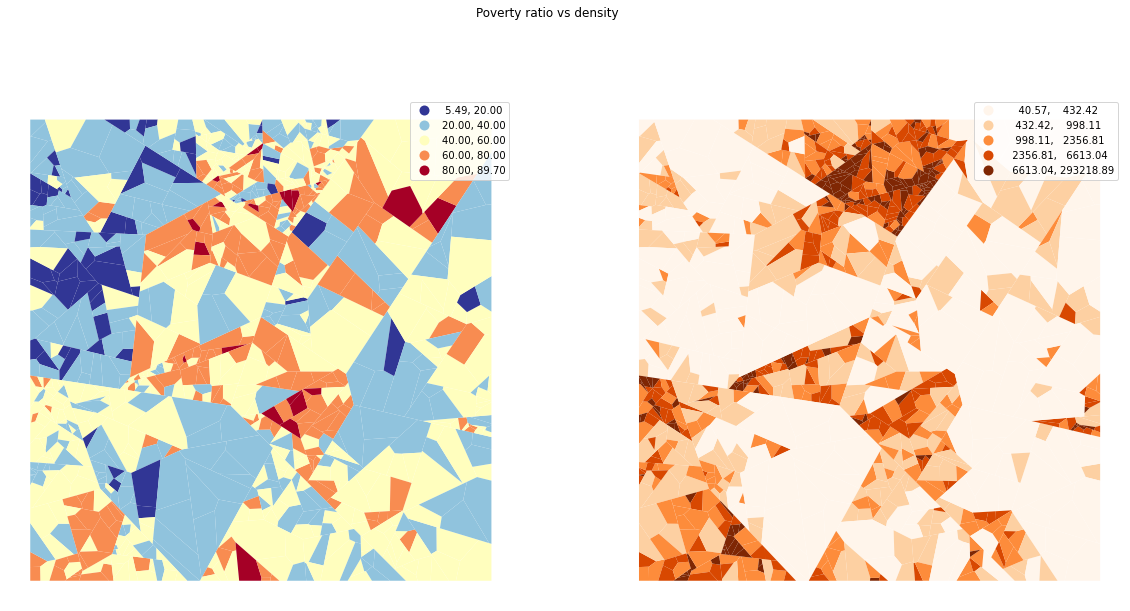

In [755]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Poverty ratio vs density')
voronoi.plot('ratio', figsize=(10,10), cmap='RdYlBu_r', scheme='userdefined', 
                classification_kwds={'bins':[20, 40, 60, 80]},legend=True, ax=ax1)
ax1.set_axis_off()
voronoi.plot('P_dens', figsize=(10,10), cmap='Oranges', scheme='quantiles', legend=True,ax=ax2)
ax2.set_axis_off()